[View in Colaboratory](https://colab.research.google.com/github/delkind/paraphraser/blob/master/notebooks/paraphraser_bible.ipynb)

In [15]:
%load_ext autoreload
%autoreload 2


# colab requirements
#!pip install spacy  #only for bible
!pip install pydrive   #to save to google-drive
!pip install num2words #only for numbers


import tensorflow as tf
import sys
import numpy as np

# our github proj!
!rm -r paraphraser  #remove previous github copy if needed
!git clone https://github.com/delkind/paraphraser.git
sys.path.append('paraphraser/src')


#usage example
from utils.persistency import Persistency   
from models import D_G_Model


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset

In [0]:
from dataset.bible import BibleDataset
dataset = BibleDataset(["asv", "ylt"], "https://raw.githubusercontent.com/scrollmapper/bible_databases/master/csv/t_",'.csv')


In [1]:
# example for datasets generators
def show_dataset_example():
  (x1,x2),y1=next(dataset.gen_g(dataset.train, batch_size=3))
  for b in range(len(x1)):
    print ('x1',x1.shape,dataset.recostruct_sentence(x1[b]))
    print ('x2',x2.shape,dataset.recostruct_sentence(x2[b]))
    print ('y1',y1.shape,dataset.recostruct_sentence(y1[b].argmax(axis=1)))
    print ('')  
  print ('results of gen_adv')  
  (x1, x2), (y1,y2) = next(dataset.gen_adv(dataset.train, batch_size=3, noise_std=0.5))  
  for b in range(len(x1)):
    print ('x1',x1.shape,dataset.recostruct_sentence(x1[b]))
    print ('x2',x2.shape,dataset.recostruct_sentence(x2[b]))
    print ('y1',y1.shape,dataset.recostruct_sentence(y1[b].argmax(axis=1)))
    print ('y2',y2[b])


show_dataset_example()  #unmark it to understand how the data looks


NameError: ignored

In [19]:
from models import D_G_Model,D_G_Trainer
from decoder import SamplingDecoder


model = D_G_Model(num_encoder_tokens=len(dataset.word2index),
                      num_decoder_tokens=len(dataset.word2index),  #from dataset 3628
                      style_out_size=len(dataset.style2index), #from dataset 2
                      cuddlstm=True,
                      latent_dim = 50, #twice the default. make it stronger! but slower
                      bidi_encoder = True,
                      adv_loss_weight=100,) #500
model.build_all()


sampler= SamplingDecoder(model)        

trainer = D_G_Trainer(model,dataset)

train_size = len(dataset.index2style) * (dataset.train[1] - dataset.train[0])
batch_size=64
epoc = int(train_size/batch_size)
print ('epoc is of',epoc,'of batches',batch_size,'total train_size',train_size)


unoptimzied decode_sequence_batch, running each of the N sample seperatly
unoptimzied decode_sequence_batch, running each of the N sample seperatly
epoc is of 756 of batches 64 total train_size 48432


# cycle appraoch

Epoch 1/1
20/20 [==============================] - 0s 15ms/step - loss: 0.6935 - acc: 0.4969 - val_loss: 0.7006 - val_acc: 0.4062
Epoch 1/1
20/20 [==============================] - 2s 108ms/step - loss: 2.7788 - dcd_sfmax_loss: 2.7304 - styl_clsf_loss: 4.8376e-04 - val_loss: 3.9134 - val_dcd_sfmax_loss: 3.9063 - val_styl_clsf_loss: 7.0550e-05
Epoch 1/1
20/20 [==============================] - 8s 383ms/step - loss: 2.8980 - dcd_sfmax_loss: 2.8662 - styl_clsf_loss: 3.1829e-04 - val_loss: 4.1053 - val_dcd_sfmax_loss: 4.0908 - val_styl_clsf_loss: 1.4523e-04
Epoch 1/1
100/100 [==============================] - 1s 14ms/step - loss: 0.6945 - acc: 0.4903 - val_loss: 0.6947 - val_acc: 0.5625
Epoch 1/1
100/100 [==============================] - 12s 122ms/step - loss: 2.8534 - dcd_sfmax_loss: 2.8273 - styl_clsf_loss: 2.6097e-04 - val_loss: 4.0516 - val_dcd_sfmax_loss: 4.0447 - val_styl_clsf_loss: 6.8851e-05
Epoch 1/1
100/100 [==============================] - 34s 338ms/step - loss: 3.0329 - dcd_s

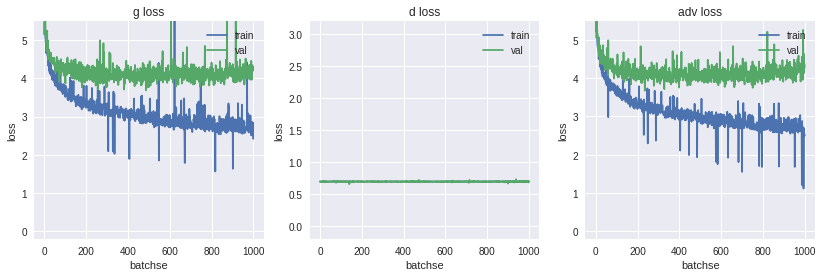

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i the children be forth his , and <OOV> . . and <OOV> <OOV> <OOV> of the . its own . <end> they the <OOV> of . <end> the <OOV> . <end> they shall not . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the hath unto i the man be its and , and and a , and <OOV> . heart is ' in the . a . him <OOV> . <end> the <OOV> . <end> <end> they is ' . <end> <end> <end> <end> <end> <end

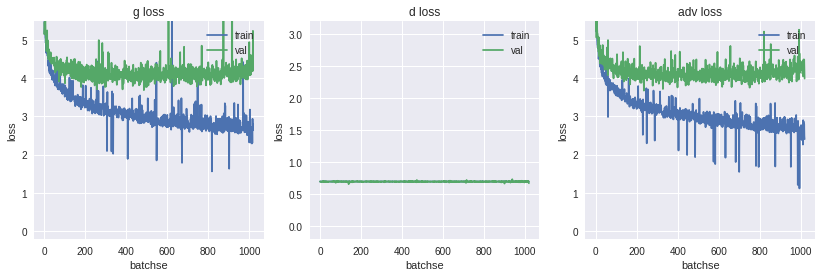

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i the king be forth the , and <OOV> down , and <OOV> <OOV> , of wood , the own , and they the <OOV> of in and the <OOV> , and they shall not . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto i the king be , , , and and seed , and tree , heart is ' in the , perfume , them kind , and the mountains , and and they hath ' . <end> <end> <end> <end> <end> <end> <

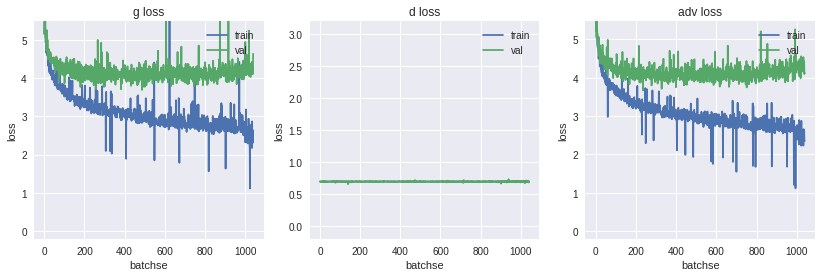

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i us children be the the , and <OOV> a , and <OOV> <OOV> , and the ; the own ; and they the <OOV> of . and the <OOV> . <end> they shall not . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto i me <OOV> be the , , and , seed , and tree , heart is ' in the , perfume , their kind , and the <OOV> , <end> <end> they hath ' . <end> <end> <end> <end> <end> <end> <

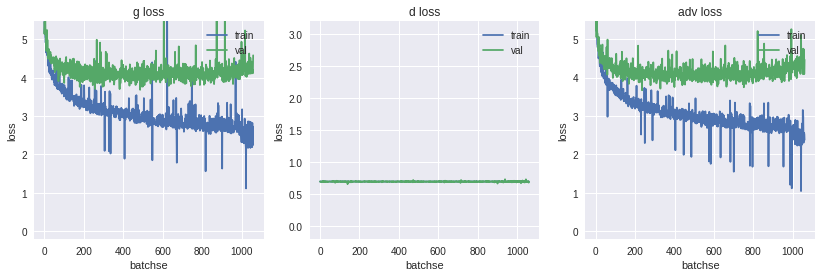

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i us children be away his , and <OOV> away . and <OOV> <OOV> . and food . the drink . <end> they the <OOV> of . <end> the <OOV> . <end> they shall not . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the hath unto i us <OOV> be one , , and they seed , and tree doth leaf is <OOV> in the . perfume . them kind . <end> the <OOV> <OOV> <end> <end> they hath not . <end> <end>

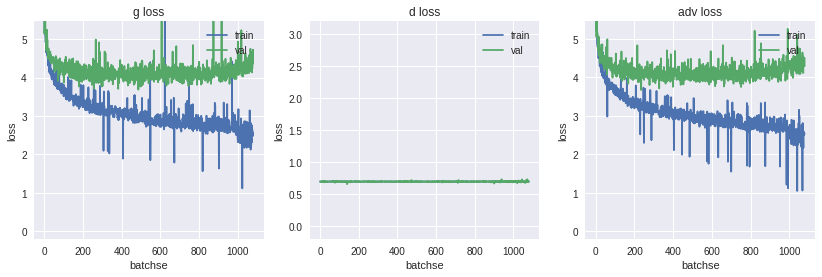

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i not king be forth the , and <OOV> fruit , and <OOV> <OOV> of and blood , their kind , and they the blood of , that the earth : and they shall not . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto lo me king be one , , and for seed , and tree , heart is ' in the , perfume , them kind , and the mountains , and and they hath ' , ' <end> <end> <end> <end> <e

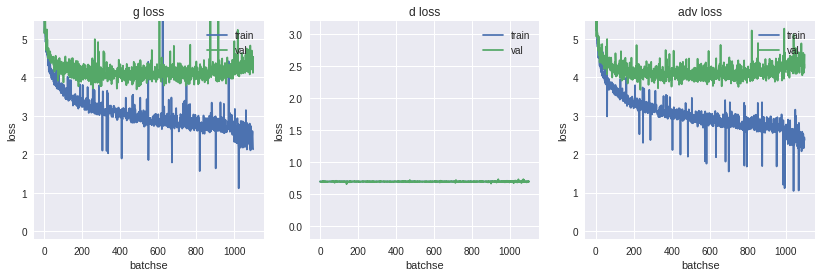

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i the <OOV> be forth thy , and <OOV> fruit . and <OOV> <OOV> . . drink . its kind . <end> they the <OOV> of . <end> the altar . <end> they was not . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the hearkeneth unto i the <OOV> be one , , and for seed , and of . heart is <OOV> . the . you . their kind . <end> the <OOV> . <end> <end> they <OOV> not . <end> <end> <end> <e

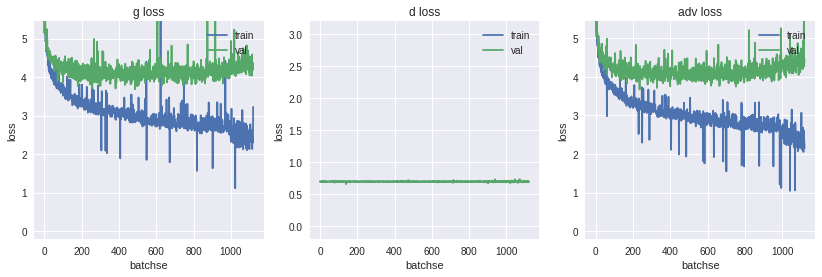

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i the king be forth the , and <OOV> , , and <OOV> <OOV> , and fruit , their kind , and they the blood of , and the altar , and they shall so , <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith , let me <OOV> roar its grass , herb sowing , , and tree , heart is ' in the , perfume , their kind , and the <OOV> , and and they hath ' , <end> <end> <end> <end> <end> <e

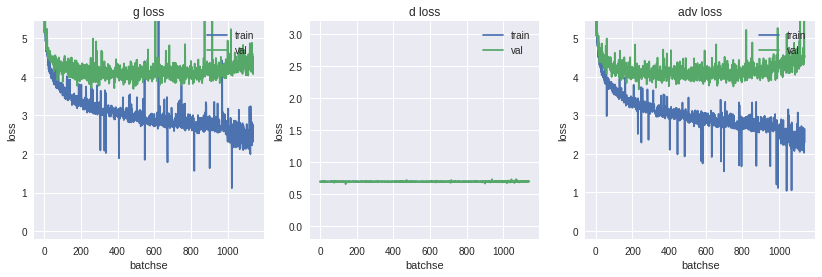

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i not king be them the to and <OOV> , , and <OOV> <OOV> , , wood , the kind , and they the blood of , and the altar , and they shall so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto lo not king be , , , and for seed , and of , leaf is ' in the , perfume , them kind , and the <OOV> , and and they hath ' , <end> <end> <end> <end> <end> <end> <end> <end> 

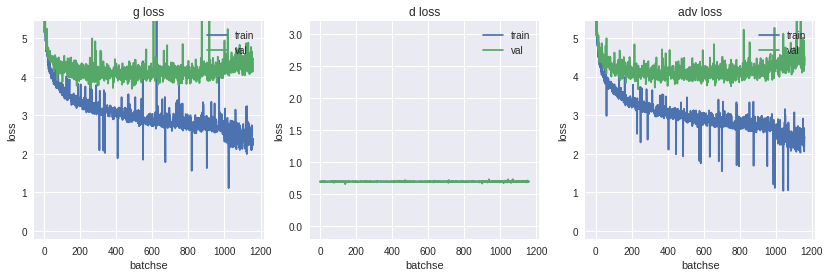

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and he said unto i the king be them thy , and <OOV> seed , and <OOV> <OOV> , and fruit , their kind , and they the blood of . and the mountains . <end> they shall so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto i the <OOV> be its , , and <OOV> seed , and of , heart is ' in the , haste , their kind , and the mountains , <end> and they hath not . <end> <end> <end> <end> 

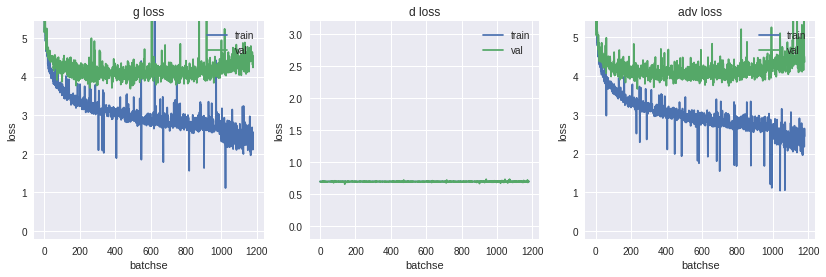

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i me king be them the in and <OOV> , , and <OOV> <OOV> of of fruit is its <OOV> , and they the plague of . and the altar . <end> they shall so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto let me king be its , , and sowing seed , and tree <OOV> heart is ' in the , it , its kind , and the <OOV> they <end> and they hath ' . <end> <end> <end> <end> <end> 

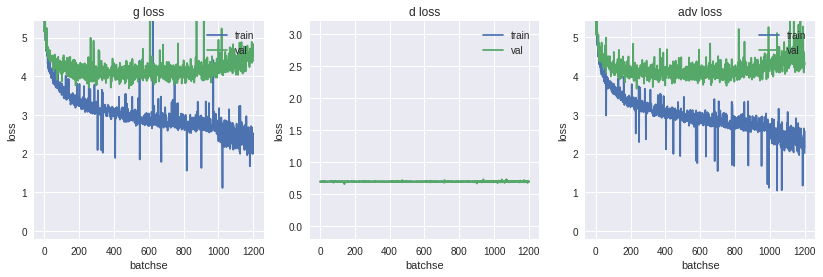

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i the children be them thy , and <OOV> fruit , and <OOV> <OOV> also and fruit . their kind , <end> they the <OOV> of . <end> the <OOV> . <end> they shall so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the hath unto let the <OOV> be , them , and <OOV> seed , and of <OOV> heart is ' in it . haste . them kind , <end> the <OOV> is <end> <end> they hath not . <end> <end

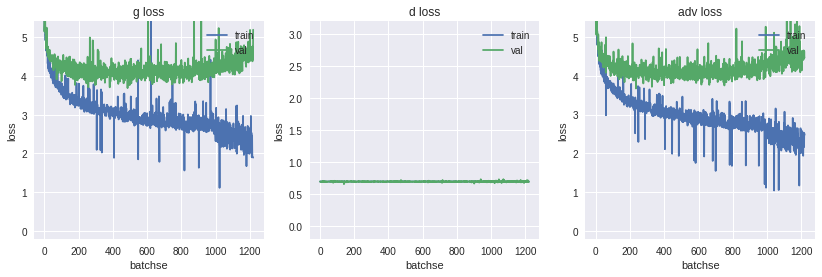

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto let not <OOV> be him thy , and <OOV> . . and faileth <OOV> <OOV> . fruit . their kind . <end> they the plague of . <end> the same . <end> they was so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the seeth , let the <OOV> be its grass , and <OOV> seed , <end> tree <OOV> heart is ' . it . haste . them own . <end> the earth . <end> <end> they <OOV> not . <end> <end> <e

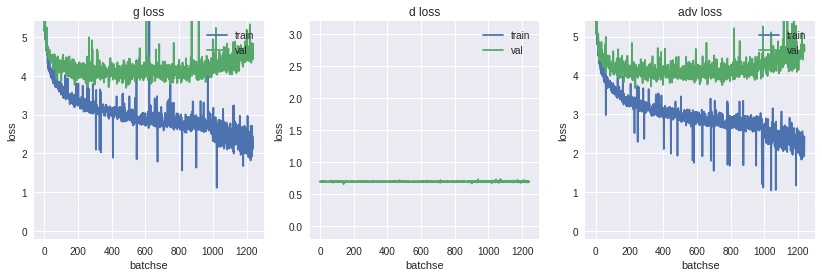

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i us king be him his of and <OOV> seed , and <OOV> <OOV> <OOV> and bread . their kind . and they the evil of in and the earth . <end> they was so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the hath , i the <OOV> be its , , and sowing seed , and is is heart is ' in it . it ! them head . <end> the <OOV> , <end> <end> the hath ' . <end> <end> <end> <end> <end> <end> 

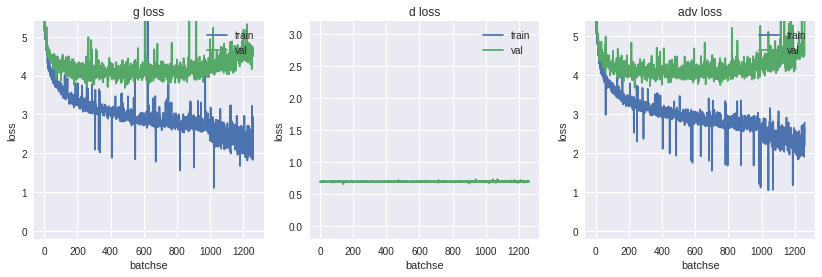

############################## verb 10 ##############################

##encoder_input[<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<asv>]: and the said unto i them king be thee thy , and , , , and their <OOV> , in drink , their own , and they the <OOV> of in and the mountains . and they shall so . <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>
gold label     [<asv>]: and god said , let the earth put forth grass , herbs <OOV> seed , and ' fruit trees bearing fruit after their kind , wherein is the seed thereof , upon the earth : and it was so .
decoder TF     [<ylt>]: and the saith unto let them <OOV> fall its them , and of grace , and torn <OOV> heart is ' in the , perfume , their kind , and the mountains , and and the hath not , <end> <end> <end> <en

In [0]:
for outside_epoc in range(200):
  
  steps_d,steps_g=(20,20) #use 20 steps for verbosity
  for inside_epoc in range(20):
      #trainer.train_g(steps_d,batch_size=32,noise_std=0.0)
      trainer.train_d(steps_d,batch_size=32,noise=0.00)
      trainer.train_d_g(steps_g ,batch_size=32,noise=0.0,noise_std=1.0)
      trainer.train_g_cycle(steps_g,batch_size=32,noise_std=10.0)
      steps_d,steps_g= (100,100)
  trainer.plt_all()
  sampler.show_sample(dataset,'train'  ,sample_ids=[10,25],teacher_forcing=True)   #,8000+0


# FAQ and wierd exceptions

* If you get exceptions related to cuda-lstm , inside the show_sample, but you actially not using it at all.  You will need to restart the notebook (thinking it's TF issue/bug)
* why the sampler without teacher-forcing emits garabage? if it emits the 1st word differently from teacher-forcing, it means that the models somehow got disconnected, or that you use wrong label (y1 should be one-hot of x1 not of x2)
* why the decoder shows bad sentences when my loss gets lower?  the loss should be **very** low before you start getting real results. typically values of g of less than 0.5
* why unkown-style sentences always generate the same sentence? probably "mode collapse" encountred during adverserial-training